In [167]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
import sys
import os

REPO_NAME = 'sewer-nfl'
CWD = str(os.getcwd())
REPO_DIR = CWD[:CWD.find(REPO_NAME)+len(REPO_NAME)]
sys.path.insert(0,REPO_DIR)

In [169]:
from models._utilities.data.pipe_layer import build_training_dataset

REGEN = True
if REGEN:
    from warehouse.config import Configuration # At model level, swictch this to model's config
    config = Configuration()
    t = build_training_dataset(config)
else: t = build_training_dataset()

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.
Index(['season', 'week', 'team', 'total_off_epa_sum', 'team_HHI'], dtype='object')


c:\Users\zacha\Documents\GitHub\sewer-nfl\models\_utilities\data\pipe_layer.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res['missing_N'] = res.isnull().sum(axis=1) / len(res.columns)


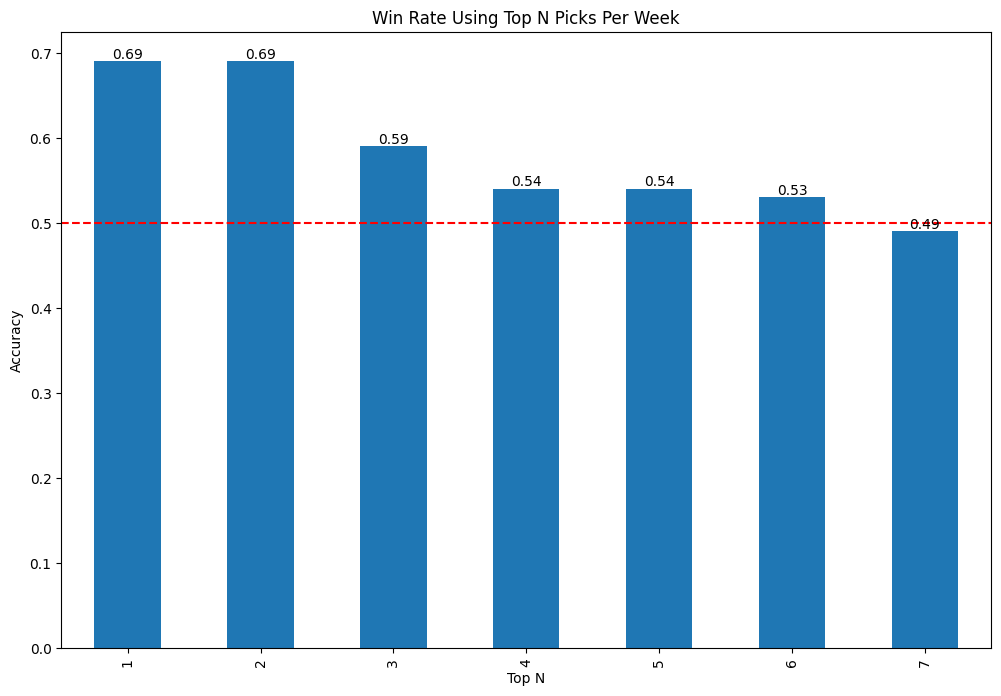

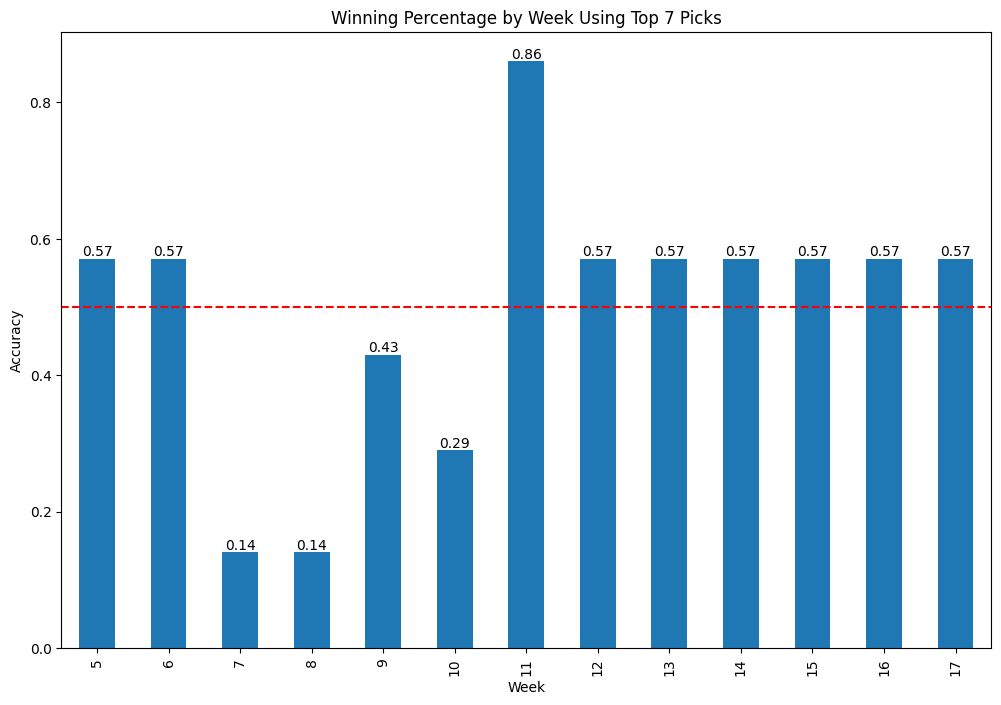

In [170]:
from models._utilities.model.sewer_boost import Model
m1 = Model(
    training_data = t
)
m1.get_test_accuracy_drop_off(top_N_range=range(1,8))
m1.get_test_accuracy_by_week(most_confident=7)

In [171]:
from warehouse.catalog import build_catalog
FUNCTION_CATALOG = build_catalog(config)

In [172]:
from models._utilities.model.sewer_boost import NUMERIC_META_COLS

In [173]:
from warehouse.archive.variable_selection import select_variable_subset

overall_coaching
points_per_epa
off_big_play_propensity
proportion_leading_three
defense_big_play_propensity
first_drive_pts_avg_allowed
def_box_stuff_rate
def_coaching
team


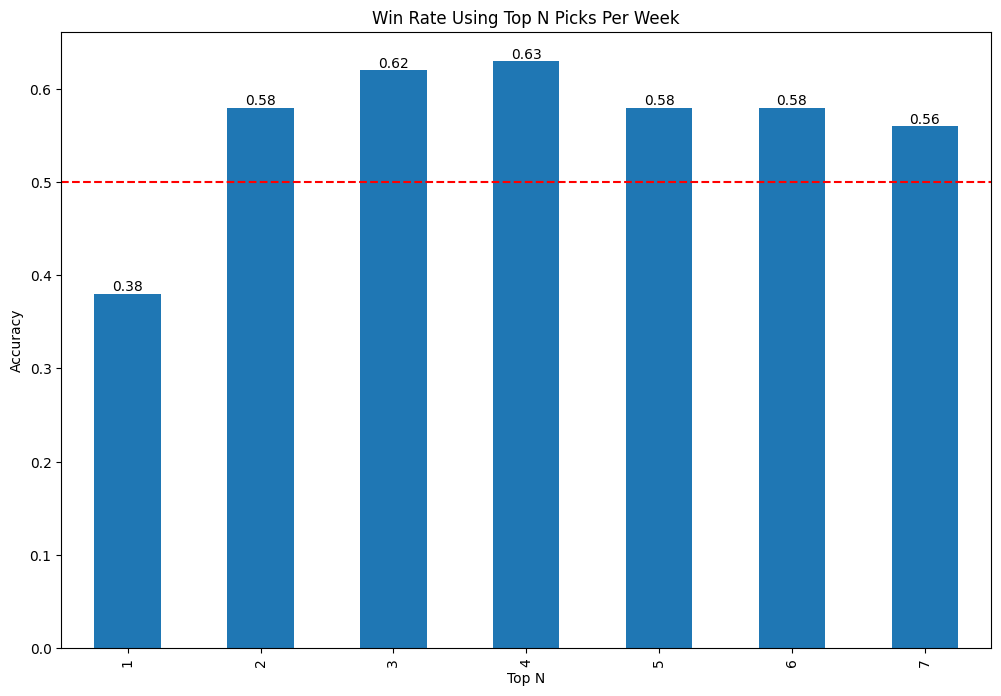

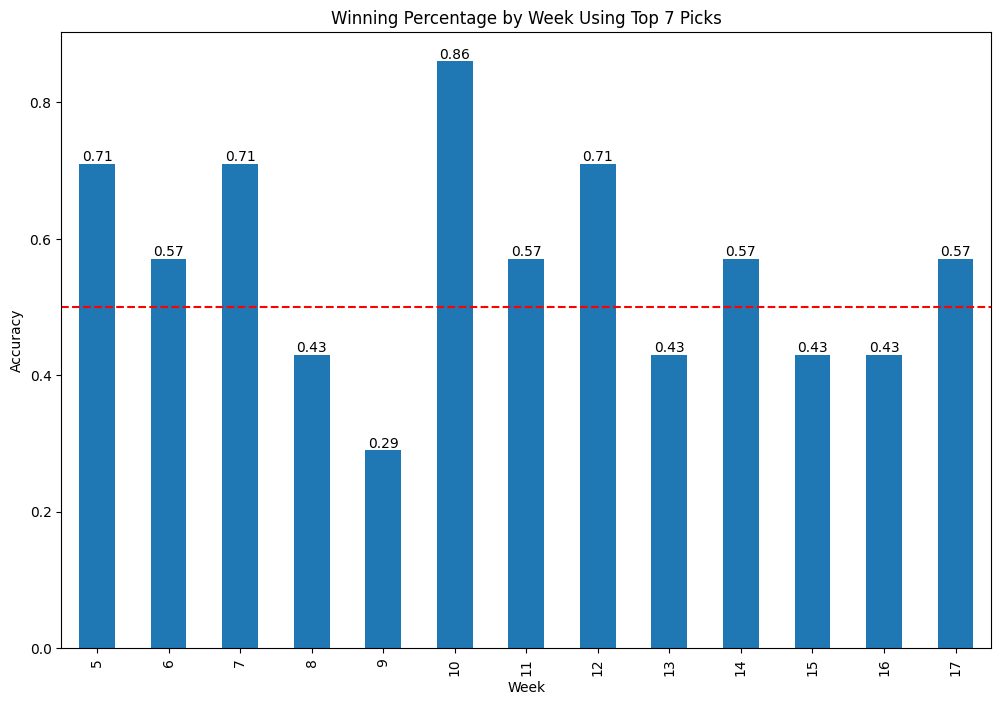

,importance,feature
10,0.075920,home_first_drive_pts_avg_allowed
4,0.074070,home_off_big_play_propensity
2,0.071172,home_points_per_epa
5,0.067857,away_off_big_play_propensity
3,0.066851,away_points_per_epa
15,0.066269,away_def_coaching
12,0.064700,home_def_box_stuff_rate
1,0.062278,away_overall_coaching
8,0.060751,home_defense_big_play_propensity
14,0.060575,home_def_coaching


In [179]:
vars = select_variable_subset(FUNCTION_CATALOG=FUNCTION_CATALOG, total_variables=8) + ['team']
vars2 = [item for sublist in [[f'home_{v}',f'away_{v}'] for v in vars] for item in sublist]
vars2.extend(NUMERIC_META_COLS)

print('\n'.join(vars))

t2 = t[vars2]
m2 = Model(
    training_data = t2,
    params = {
            'objective':'binary:logistic',
            'gamma':0.4,
            'learning_rate':0.005,
            'max_depth':10,
            'n_estimators':100,
            'tree_method':'hist',
            'grow_policy': 'lossguide',
            'reg_alpha': 0.5,
            'reg_lambda': 0.5
        }
)
m2.get_test_accuracy_drop_off(top_N_range=range(1,8))
m2.get_test_accuracy_by_week(most_confident=7)
m2.assess_predictor_importance()

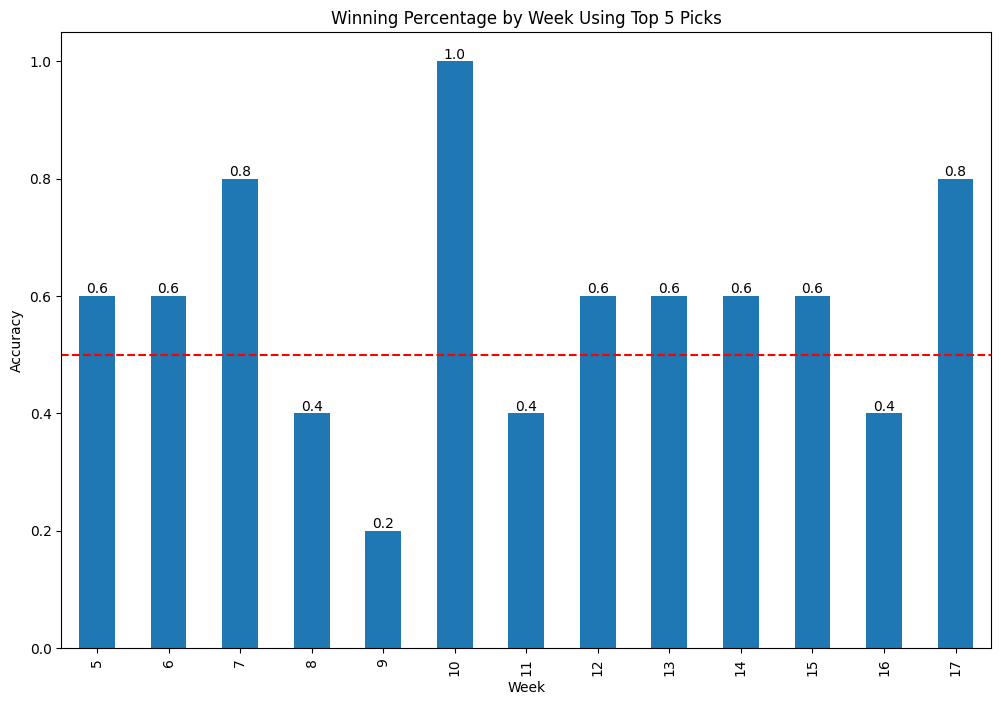

In [181]:
m2.get_test_accuracy_by_week(most_confident=5)
